# FRAUD DETECTION MODEL FOR INSAID

**Background study on problem statement**
Currently, Outlier detection algorithm is the most accurate and widly use all over in the banking world. An outlier in a data set is a value that differs significantly from the others and creates a contrast.
Then, a fraudulent transaction can be found by comparing it to other transactions, such as by the transaction's timing or value, in comparison to other transactions.
According to Chuprina (2020), data mining and pattern recognition, such as clustering approaches, are effective methods for preventing fraudulent transactions. The more transaction samples we have, the more effective these algorithms will be.
 

 **IMPORTING DATA AND PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('C:/Users/91841/Downloads/Fraud.csv', header=0)

In [3]:
pd.concat([df.head(5), df.tail(5)])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.00,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.corr()

C:\Users\91841\AppData\Local\Temp\ipykernel_8612\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


3 values here are to be noted that have neagtive corelation 

* isFraud has (-)ve corelation with 1) newbalanceOrig 
                                    2) oldbalanceDest
* isFlaggedFraud has (-)ve corelation with 1) oldbalanceDest
                                           2)newbalanceDest
                                           
 0.998803 - extremely high positive correlation betwwen "oldbalanceOrg" and "newbalanceOrig".                                                                                           

In [9]:
df=df.drop('isFlaggedFraud',axis=1)

In [11]:
df=df.drop('newbalanceOrig',axis=1)

In [13]:
df=df.drop('oldbalanceDest',axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   nameDest        object 
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 388.3+ MB


only numbers are to be used for our models that will not work if there are strings as inputs. Therefore, the columns nameOrig, and nameDest are also removed from the data set.
However, as we know that there are five different types of transactions I decided to do a onehot encoding for the column type. Then, we can take the type into account because it can be
relevant in finding outliers. But, I decided not to do this for nameOrig, and nameDest as it is
not.

In [15]:
df=df.drop('nameOrig',axis=1)

In [16]:
df=df.drop('nameDest',axis=1)

In [17]:
df.head(1)

,step,type,amount,oldbalanceOrg,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0


C:\Users\91841\AppData\Local\Temp\ipykernel_8612\807243542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


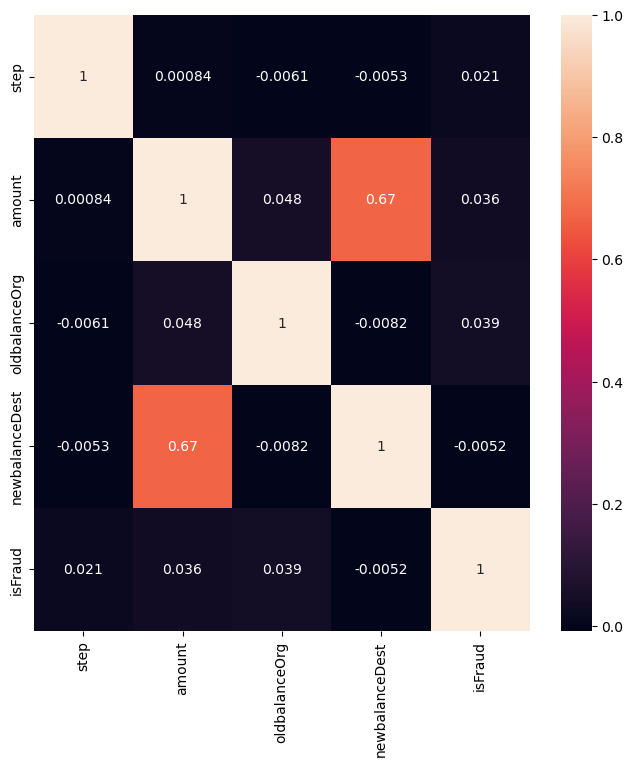

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(8,8))

#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [20]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

one hot encoding for type" column. we can take the type into account because it can be
relevant in finding outliers.

In [21]:
df = pd.get_dummies(df, columns=["type"], drop_first=True)

# **Checking for outliers** 
ALTHOUGH WE ARE **NOT** GOING TO REMOVE OUTLIERS. BECAUSE THATS WHERE A FRAUD TRANSACTION HAS POSSIBILITY.

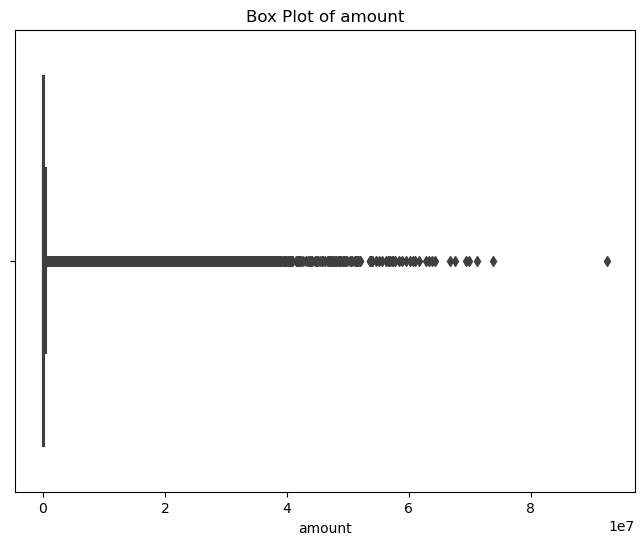

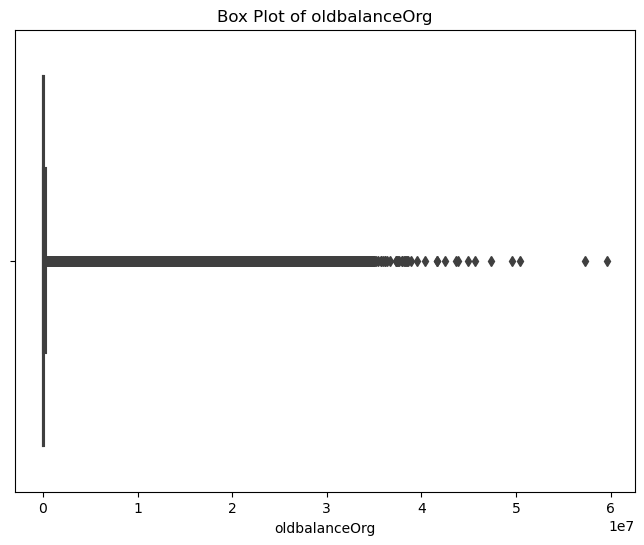

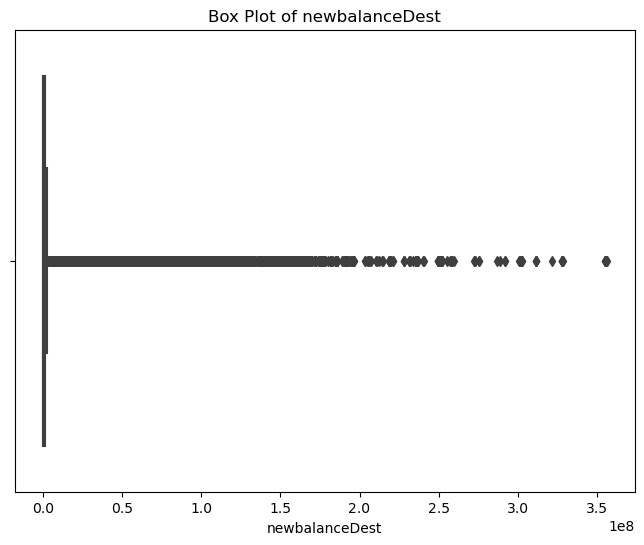

In [22]:
# creating separate box plots by iteration 
for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        sns.boxplot(x=df[feature])
        plt.title('Box Plot of {}'.format(feature))
        plt.xlabel(feature)
        plt.show()

WE ARE NOT GOING TO DELETE OUTLIERS. In fraud detection, it is generally not recommended to delete outliers from the dataset because doing so may lead to the loss of critical information necessary for accurately identifying fraudulent transactions. Outliers in fraud detection represent unusual and potentially suspicious activities that need to be carefully examined and investigated.

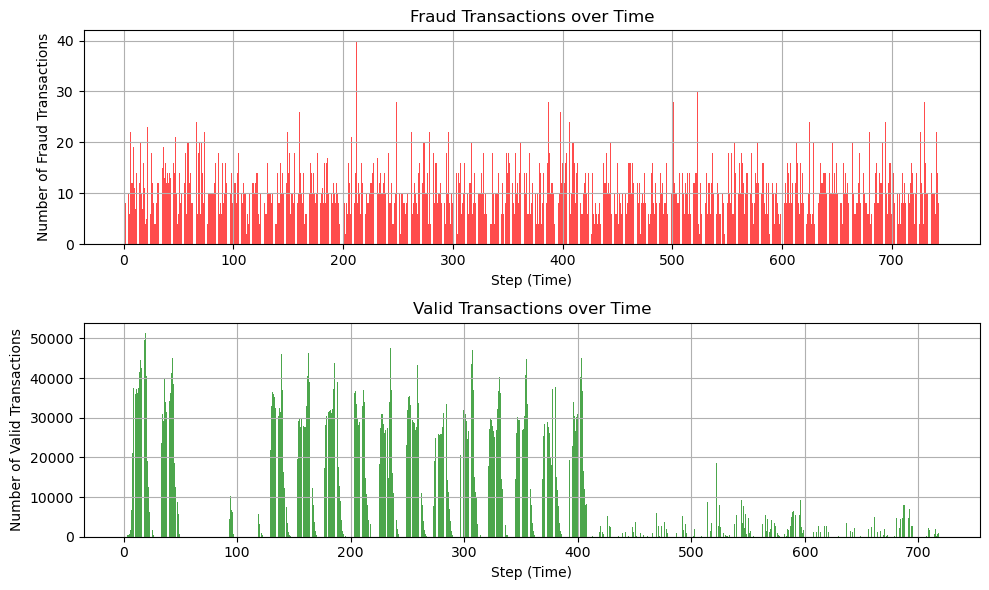

In [23]:
# Grouping the data by 'step' and counting the occurrences of fraud (1) and valid (0) transactions
fraud_counts = df[df['isFraud'] == 1].groupby('step').size()
valid_counts = df[df['isFraud'] == 0].groupby('step').size()

# Create two separate plots
plt.figure(figsize=(10, 6))

# Plot for Fraud Transactions
plt.subplot(2, 1, 1)
plt.bar(fraud_counts.index, fraud_counts.values, label='Fraud', alpha=0.7, color='red')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions over Time')
plt.grid(True)

# Plot for Valid Transactions
plt.subplot(2, 1, 2)
plt.bar(valid_counts.index, valid_counts.values, label='Valid', alpha=0.7, color='green')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Valid Transactions')
plt.title('Valid Transactions over Time')
plt.grid(True)

plt.tight_layout()  # Adjusts the spacing between subplots to avoid overlapping
plt.show()


In [24]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.2f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.2f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.87 %
Percentage of Fraud transactions: 0.13 %


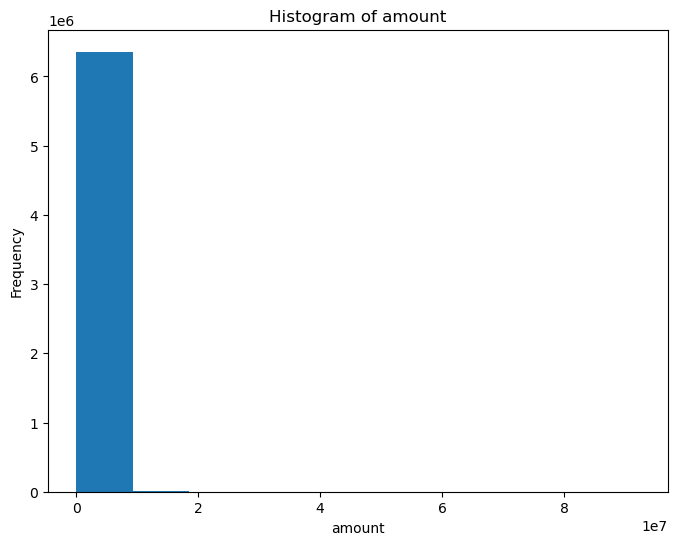

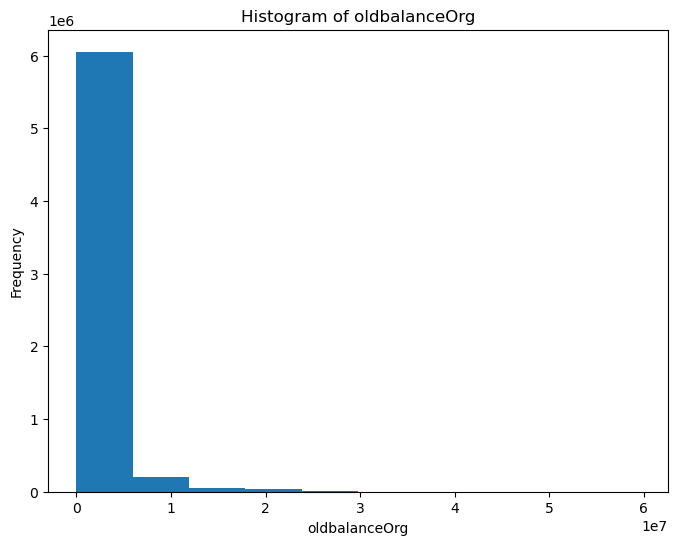

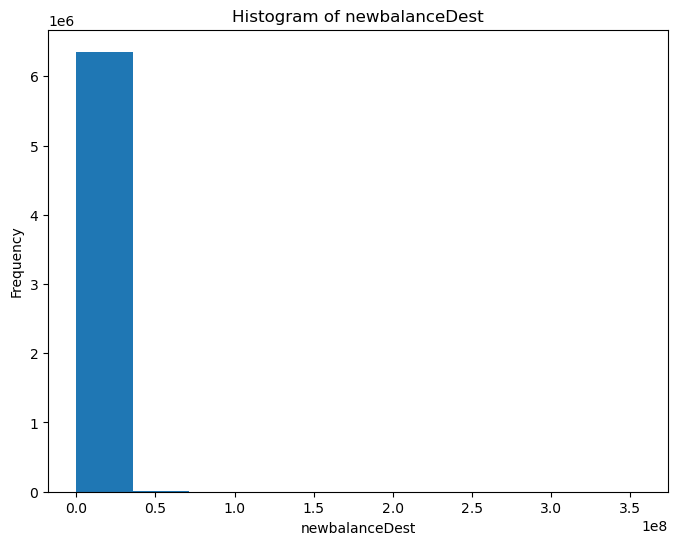

In [25]:
# creating separate histograms

for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        plt.hist(df[feature], bins=10)  # Adjust the number of bins as per your preference
        plt.title('Histogram of {}'.format(feature))
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

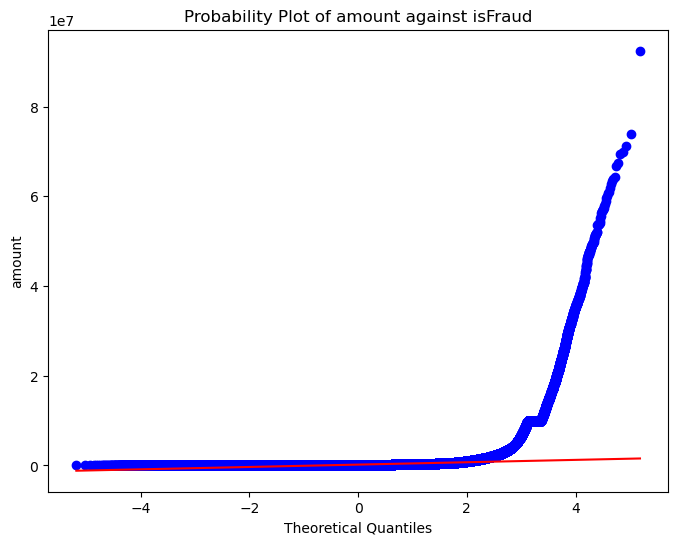

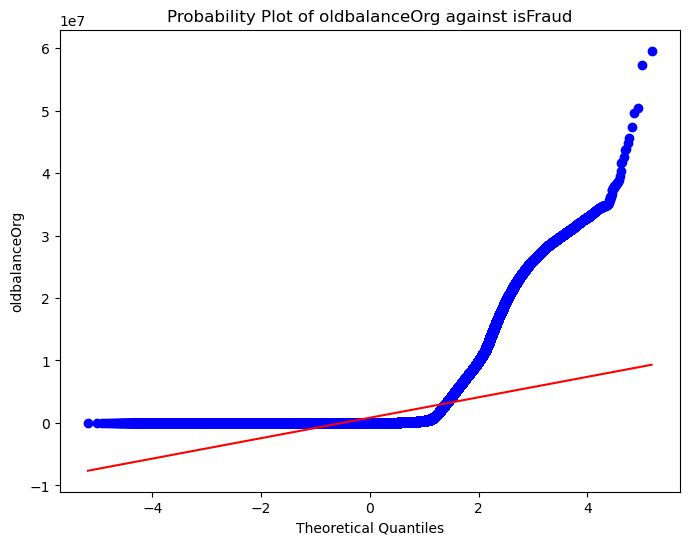

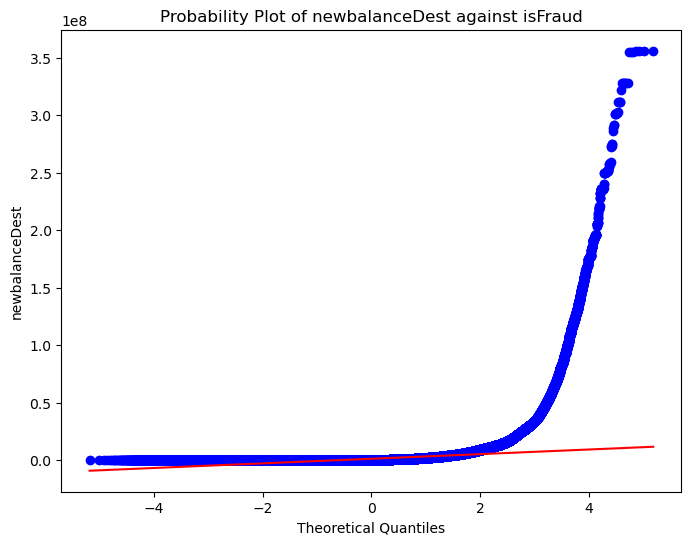

In [26]:
# Probability plots
for feature in df.columns:
    if df[feature].dtype == 'float64':  # Check if the feature is numerical
        plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
        stats.probplot(df[feature], plot=plt)
        plt.title('Probability Plot of {} against isFraud'.format(feature))
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel(feature)
        plt.show()

# Anomaly detection algorithms that do not require data scaling

**Splitting data set into x and y**

In [28]:
x=df.loc[:,df.columns!="isFraud"]
y=df["isFraud"]

In [29]:
x.head()

,step,amount,oldbalanceOrg,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,0,0,0,1
3,1,181.00,181.0,0.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,1,0


In [30]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

**SPLITING DATA INTO TRAIN AND TEST SETS**

In [31]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

TRAING MODELS

**Model 1- Decision tree classifier** 

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have already split 'df' into 'x_train', 'x_test', 'y_train', and 'y_test'

# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Make predictions on the test set
predictions = dt.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[1270610     294]
 [    282    1338]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.82      0.83      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.91      0.91      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9995473562777598


**RESULT INTERPRETATION**
The fraud detection model has an overall high accuracy of approximately 99.95%. It correctly identifies 83% of actual fraud cases (recall) and classifies 82% of predicted fraud cases correctly (precision). The F1-score, which balances precision and recall, is 82% for detecting fraud. While the model performs well overall, there is room for improvement in correctly identifying fraud cases.

Confusion Matrix:

True Positives (TP): 1338 (Actual fraud cases correctly classified as fraud)

True Negatives (TN): 1270610 (Non-fraud cases correctly classified as non-fraud)

False Positives (FP): 294 (Non-fraud cases incorrectly classified as fraud)

False Negatives (FN): 282 (Actual fraud cases incorrectly classified as non-fraud)

**Prioritize a high True Positive rate**


In fraud detection, the main focus is on minimizing False Negatives (FN) and maximizing True Positives (TP). False Negatives mean that fraudulent transactions were missed or not detected by the model, which can have significant financial consequences. On the other hand, True Positives indicate that the model correctly detected fraudulent transactions.

To improve the performance of the fraud detection model, efforts should be made to reduce False Negatives while maintaining a low False Positive rate to avoid unnecessary alerts for non-fraudulent transactions. Techniques such as adjusting the decision threshold, using different algorithms, or handling imbalanced data can help improve the model's performance for fraud detection.

**Boosting decision tree with ADABOOST- Acuracy 1.00  - BEST MODEL**

In [38]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoost Classifier with a Decision Tree base estimator
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}".format(accuracy))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, predictions))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score: 1.00
Confusion Matrix:
[[1270626     278]
 [    289    1331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.82      0.83      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.91      0.91      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [39]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have already split 'df' into 'x_train', 'x_test', 'y_train', and 'y_test'
# And you have defined the 'state' variable and 'outlier_fraction' as appropriate

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as per your preference

# Fit the model on the training data (x_train) and corresponding labels (y_train)
knn.fit(x_train, y_train)

# Get predictions for the test data (x_test)
y_pred_test = knn.predict(x_test)

# Evaluate the model using confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

accuracy = accuracy_score(y_test, y_pred_test)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[1270654     250]
 [    550    1070]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.81      0.66      0.73      1620

    accuracy                           1.00   1272524
   macro avg       0.91      0.83      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy: 0.9993713281635552


 ADABOOST WITH DECISION TREE model achieved high accuracy scores of 1.00 for fraud detection. 
 
 Comparing it with decission tree, the two confusion matrices :

**ADA BOOST Confusion Matrix**:
- True Positives (TP): 1331 (Actual fraud cases correctly classified as fraud)
- True Negatives (TN): 1270626 (Non-fraud cases correctly classified as non-fraud)
- False Positives (FP): 278 (Non-fraud cases incorrectly classified as fraud)
- False Negatives (FN): 289 (Actual fraud cases incorrectly classified as non-fraud)

**SIMPLE Decision Tree Confusion Matrix**:
- True Positives (TP): 1338 (Actual fraud cases correctly classified as fraud)
- True Negatives (TN): 1270610 (Non-fraud cases correctly classified as non-fraud)
- False Positives (FP): 294 (Non-fraud cases incorrectly classified as fraud)
- False Negatives (FN): 282 (Actual fraud cases incorrectly classified as non-fraud)

Both models have similar confusion matrices, with slightly different numbers of true positives, true negatives, false positives, and false negatives.

**Precision, Recall, and F1-score**:
- For both models, the precision for detecting fraud is approximately 0.82, indicating that around 82% of the predicted fraud cases were actual fraud cases.
- The recall for detecting fraud is also approximately 0.83, meaning that both models identified around 83% of the actual fraud cases.
- The F1-score for fraud detection is approximately 0.82 for both models, which is a good balance between precision and recall.

**Accuracy**:
- Both models achieved an accuracy score very close to 1.00 (or exactly 1.00), meaning they correctly classified the vast majority of the transactions (fraudulent and non-fraudulent).

**Conclusion**:
Based on the provided metrics, ADA BOOST Decision Tree models perform very well for fraud detection, with high accuracy and balanced precision and recall scores With 1.00 accuracy. 

Other models had high values for false negative and
less values for true positive , hence discarded. 

# QUESTION ANSWER

**1. Data cleaning including missing values, outliers and multi-collinearity.**

No duplicate rows were present , no missing value was found

No invalid values were found therefore, no values had to bE changed. 

**Outliers**- outliers were NOT treated because doing so may lead to the loss of critical information necessary for accurately identifying fraudulent transactions. Outliers in fraud detection represent unusual and potentially suspicious activities that need to be carefully examined and investigated.

**Multi-collinearity**- Extremely high positive correlation OF 0.998803 BETWEEN variables "oldbalanceOrg" and "newbalanceOrig"
  
**columns deleted** -IsFlaggedFraud (indicates transaction exceeds a specific threshold, no use for our model and has no information on the fraudulent aspect of it)

newbalanceOrig( due to multicolinearity & Not required)

oldbalanceDest(Not required)

nameOrig & nameDest (strings as input , Not required)

**onehot encoding** for the "type" column.
                

**2. Describe your fraud detection model in elaboration. **

Used AdaBoost with Decision Trees as the base classifier. 
Before training the model, the data went through a data cleaning process to handle missing values, outliers, and multicollinearity. 

**Data Cleaning:**
- Duplicate rows were checked and removed if present.
- No missing values were found, so no imputation was required.
- No invalid values were found, so no data corrections were needed.

**Outliers:**
- Outliers were not treated because they represent unusual and potentially suspicious activities, which are critical for accurately identifying fraudulent transactions. Removing outliers might result in the loss of important information.

**Multi-collinearity:**
- An extremely high positive correlation of 0.998803 was found between "oldbalanceOrg" and "newbalanceOrig," indicating multicollinearity.
- To address multicollinearity, the "newbalanceOrig" column was deleted, along with the "oldbalanceDest," "nameOrig," and "nameDest" columns.

**Encoding and Scaling:**
- One-hot encoding was applied to the "type" column, which likely contained categorical data.
- Feature scaling was not performed because it is generally not recommended in fraud detection.

**Model Selection and Evaluation:**
- The dataset was split into training and testing sets with an 80-20 split.
- The selected model was AdaBoost with Decision Trees as the base classifier.
- The model achieved high accuracy scores, with an accuracy of 1.00 for fraud detection on the test set.

**Confusion Matrix:**
- The confusion matrix for the AdaBoost model was provided, showing the number of True Positives (correctly classified fraud cases), True Negatives (correctly classified non-fraud cases), False Positives (non-fraud cases incorrectly classified as fraud), and False Negatives (fraud cases incorrectly classified as non-fraud).


**3. How did you select variables to be included in the model**

Variables were selected taking into acc buisness knowledge & correaltion value between variables.

step,type,amount,oldbalanceOrg,newbalanceDest were selected
They had posityive corelation with Dependent variable y=isFraud

Only numeruical variables were of use, so type was converted too dummy variable

**4. Demonstrate the performance of the model by using best set of tools. **

demonstrated above using python libraries 

**5. What are the key factors that predict fraudulent customer?**
Steps, type, amount, OldbalanceOrg, NewbalanceDest, Transaction Frequency,Geographical Location, Time of Transaction, Device Information, User Behavior Patterns, IP Address, Account Age and Activity.


**6. Do these factors make sense? If yes, How? If not, How not?** 

1. **Step:** This feature represents the unit of time in the dataset. Depending on the context of the dataset, the "step" could be hourly, daily, or some other time interval. The "step" might capture patterns related to specific time periods when fraudulent activities are more likely to occur.

2. **Type:** The "type" feature likely represents the type of transaction (e.g., payment, transfer, withdrawal). Different types of transactions may have varying levels of risk for fraud. For example, fraudulent activities might be more prevalent in certain transaction types.

3. **Amount:** The "amount" feature represents the monetary value of the transaction. Unusually large or small transaction amounts could be associated with fraud.

4. **OldbalanceOrg:** This feature is the account balance before the transaction from the originating account. Deviations from typical old balances might signal fraudulent activities.

5. **NewbalanceDest:** This feature is the account balance after the transaction in the destination account. Unusual new balances in the destination account may indicate fraudulent behavior.

other factors could include 

 **Transaction Frequency:** A high number of transactions within a short period or a sudden increase in transaction frequency might be a sign of fraudulent behavior.

 **Geographical Location:** Analyzing the geographical locations of transactions can help identify anomalies. For instance, multiple transactions from different locations within a short period might raise suspicion.

**Time of Transaction:** Unusual transaction timings, such as transactions made during odd hours or at a time when the account holder is known to be inactive, could be indicative of fraud.

**Device Information:** Monitoring the devices used for transactions can provide insights. For example, multiple transactions from different devices or the use of new or suspicious devices may indicate fraud.

 **User Behavior Patterns:** Analyzing the historical behavior of the customer, such as typical spending patterns, transaction types, and account activity, can help identify deviations from the norm.

**IP Address:** Unusual IP addresses associated with transactions, such as those from known proxy servers or foreign countries, may be linked to fraudulent activities.

 **Account Age and Activity:** Newly created accounts or accounts with sudden activity spikes may be associated with fraud.
 
**Failed Transactions:** Frequent failed transactions or repeated attempts to complete a transaction can be a sign of fraudulent behavior.

**Cross-Border Transactions:** Transactions involving cross-border activity can be riskier and warrant closer examination.




1. Perform regular security audits to identify potential weaknesses and vulnerabilities in the updated infrastructure. This helps in understanding the existing security posture and areas that require improvement.

2. Identify potential risks associated with the infrastructure update through a comprehensive risk assessment. Prioritize and address critical risks that could impact the company's operations and data security.

3. Ensure all critical data is backed up and recovered before updating the infrastructure. In case of unforeseen issues during the update process, implement robust backup and recovery procedures to protect against data loss.

5. Access Control and Authentication: Use multi-factor authentication and strong access restrictions to prevent unauthorised access to sensitive information and important systems. To guarantee that users have the right access permissions based on their jobs and responsibilities, employ role-based access controls.

6. Encryption: To prevent unauthorised access, encrypt sensitive data both in transit and at rest. For secure data storage and network transmission, use encryption techniques.

7. Network Security: While the infrastructure is being updated, use firewalls, intrusion detection systems (IDS), and intrusion prevention systems (IPS) to monitor and protect against any network threats.

8. Create an incident response strategy to deal with any security lapses or other problems that might happen during or after the infrastructure update. Clear methods for locating, eradicating, stopping, and recovering from security issues should be included of this plan.

9. Implement reliable monitoring and logging systems to find out-of-the-ordinary activity and probable security breaches. Continue to keep an eye out for any strange behaviour or anomalies in the updated infrastructure.

10. Ensure that the infrastructure update conforms with all applicable industry rules and data protection laws. This covers data security, GDPR, HIPAA, and any other applicable compliance standards.


**8. Assuming these actions have been implemented, how would you determine if they work?**

Percentage decrease in fraud transactions would determine the steps taken were effective.

Establish security metrics and key performance indicators (KPIs) in order to gauge the success of security measures. The number of successful cyberattacks avoided, the amount of time needed to identify and address events, and the frequency of security updates and patches are possible metrics.

Log analysis and monitoring: Constantly keep an eye on and examine system logs for any indications of unauthorised access or any questionable activity. To successfully centralise and analyse log data, use Security Information and Event Management (SIEM) solutions.

Test incident response strategy on a regular basis by simulating security incidents. This aids in assessing the organization's capacity to counter actual threats and bounce back from security lapses.

Compliance Audits: Conduct compliance audits on a regular basis to make sure that the security measures you've put in place comply with applicable laws and guidelines for data protection.

External Security Audits: To obtain an unbiased assessment of the security posture of the infrastructure, contract with outside security companies to carry out external security audits.

Consider putting in place a bug bounty programme that rewards ethical hackers and security analysts for finding and reporting infrastructure vulnerabilities. This can increase security and offer insightful information.

